SVM Model Implementation

Why SVM? 
Can be used even for data sets which are not linear seperable.

        Age  RestingBP  Cholesterol     MaxHR   Oldpeak  ChestPainType_ATA  \
0  0.229167   0.230769     0.359324  0.348148  0.701754                0.0   
1  0.437500   0.679487     0.633093  0.614815  0.350877                0.0   
2  0.604167   0.871795     0.610514  0.340741  0.526316                0.0   
3  0.562500   0.487179     0.407304  0.244444  0.350877                1.0   
4  0.520833   0.410256     0.638738  0.311111  0.736842                0.0   

   ChestPainType_NAP  ChestPainType_TA  RestingECG_Normal  RestingECG_ST  \
0                0.0               0.0                0.0            0.0   
1                0.0               0.0                1.0            0.0   
2                0.0               0.0                0.0            0.0   
3                0.0               0.0                1.0            0.0   
4                0.0               0.0                0.0            0.0   

   ST_Slope_Flat  ST_Slope_Up  FastingBS  age_group  Cholestoral_group  \


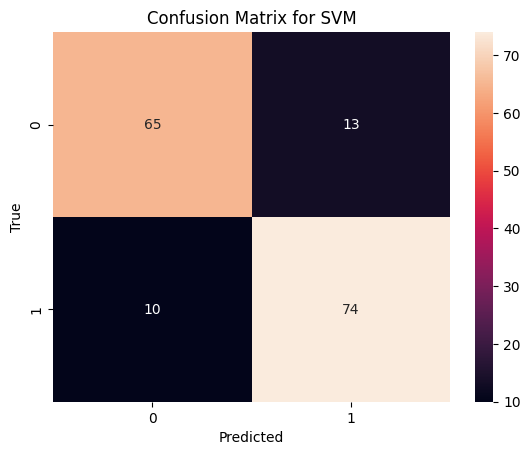

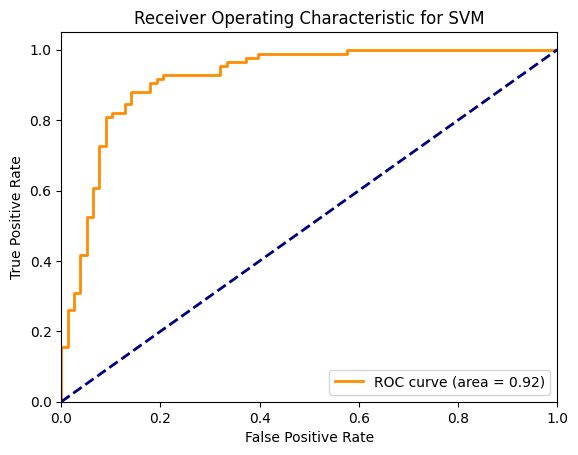

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
import seaborn as sns

# Load the dataset with corrected file paths
df_training_set = pd.read_csv('D:\Repos\e19-co544-Heart-Disease-Prediction-System\DataSet for Training and Testing\Training_Set.csv')
df_testing_set = pd.read_csv('D:\Repos\e19-co544-Heart-Disease-Prediction-System\DataSet for Training and Testing\Testing_Set .csv')
df_y_test = pd.read_csv('D:\Repos\e19-co544-Heart-Disease-Prediction-System\DataSet for Training and Testing\y_test.csv')
df_y_train = pd.read_csv('D:\Repos\e19-co544-Heart-Disease-Prediction-System\DataSet for Training and Testing\y_train.csv')

# Display the first few rows of the dataset to understand its structure
print(df_training_set.head())

# Check for missing values
print(df_training_set.isnull().sum())

# Extract features and target (assuming df_y_train and df_y_test contain the target values)
X_train = df_training_set
y_train = df_y_train.values.ravel()  # .values.ravel() converts DataFrame to 1D array
X_test = df_testing_set
y_test = df_y_test.values.ravel()  # .values.ravel() converts DataFrame to 1D array

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize classifiers
models = {
    'SVM': svm.SVC(kernel='linear', gamma='auto', C=2, probability=True),
    # 'Logistic Regression': LogisticRegression(max_iter=1000),
    # 'Random Forest': RandomForestClassifier(n_estimators=100)
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_predict = model.predict(X_test_scaled)
    
    # Classification report
    print(f"Classification Report for {name}:")
    print(classification_report(y_test, y_predict))
    
    # Accuracy
    accuracy = accuracy_score(y_test, y_predict)
    print(f"Accuracy for {name}: {accuracy:.2f}")
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_predict)
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # ROC Curve
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test_scaled)[:, 1]
    else:  # use decision function for models without predict_proba
        y_prob = model.decision_function(X_test_scaled)
        
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic for {name}')
    plt.legend(loc="lower right")
    plt.show()


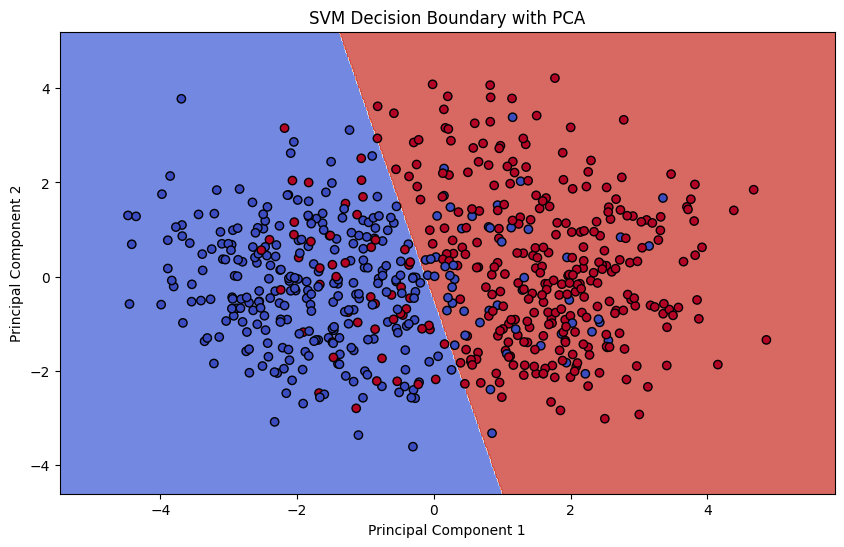

In [3]:
from sklearn.decomposition import PCA

# Reduce the dataset to 2 dimensions using PCA for visualization
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_train_scaled)

# Train the SVM model on the reduced dataset
svm_model = svm.SVC(kernel='linear', gamma='auto', C=2)
svm_model.fit(X_reduced, y_train)

# Create a mesh grid for plotting decision boundaries
h = .02  # step size in the mesh
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')
plt.title('SVM Decision Boundary with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


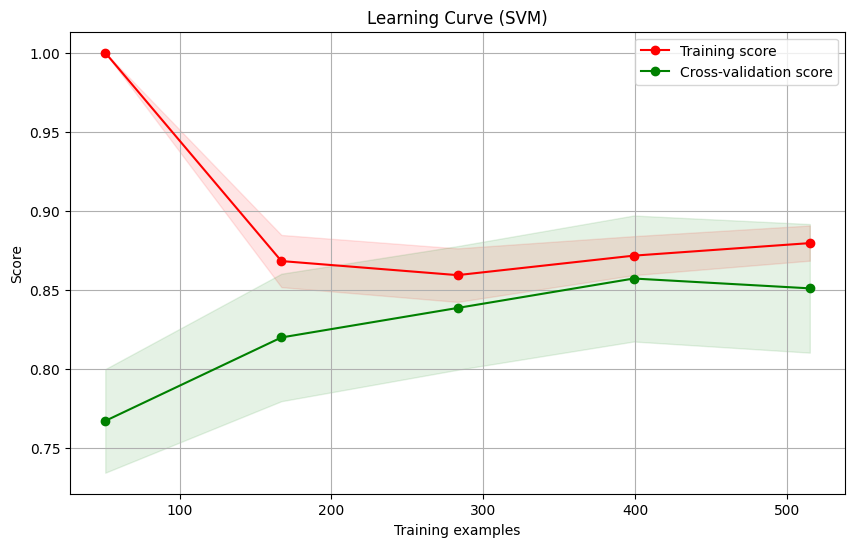

In [5]:
from sklearn.model_selection import learning_curve

# Function to plot learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    return plt

# Plot learning curve for SVM
plot_learning_curve(svm.SVC(kernel='linear', gamma='auto', C=2), "Learning Curve (SVM)", X_train_scaled, y_train, cv=5)
plt.show()
